In [2]:
import os,json,math
import netCDF4 as nc4
import xarray,pandas,numpy

import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap

datasets = json.load( open( "datasets.json" , "r" ) )

# Series

##### Work in progress. June : Red , July : Green , August : Blue


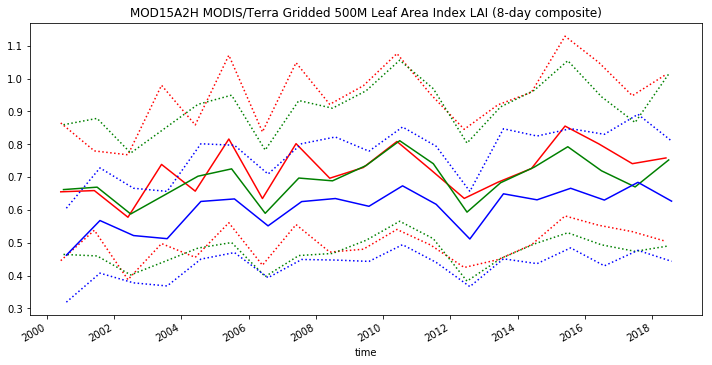

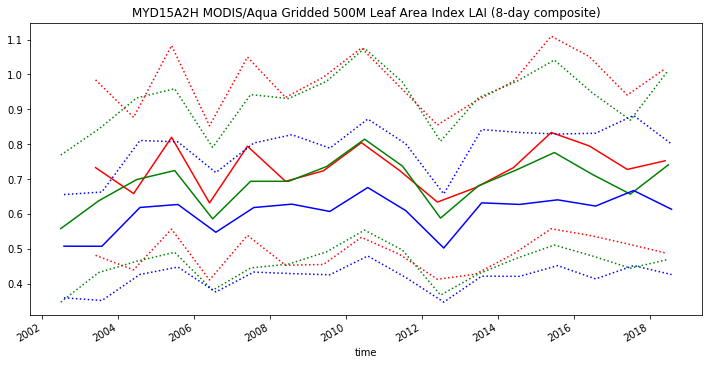

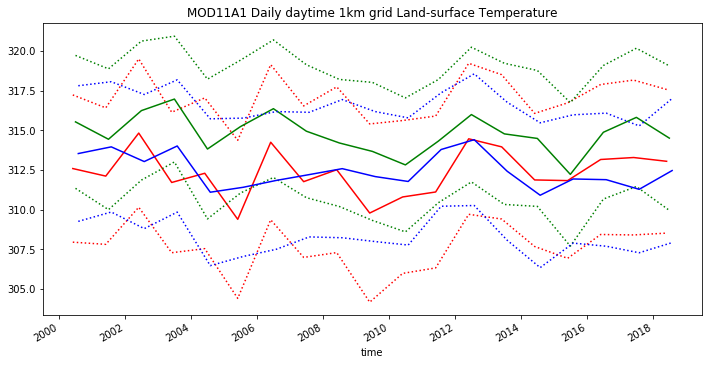

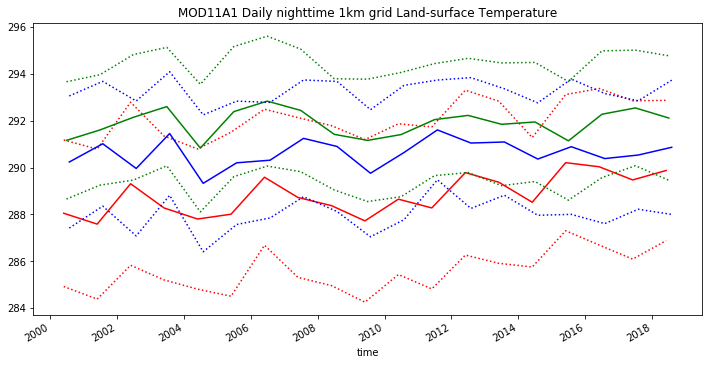

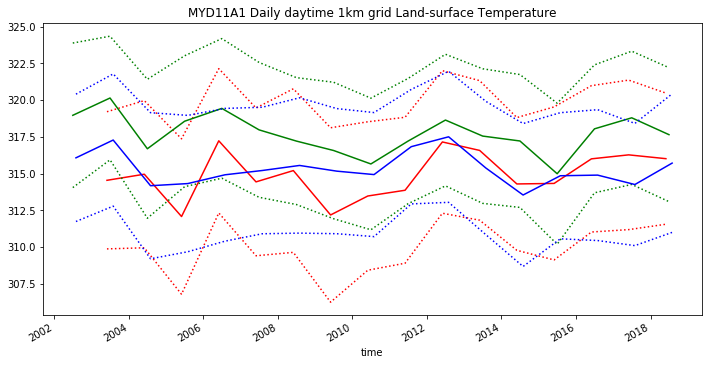

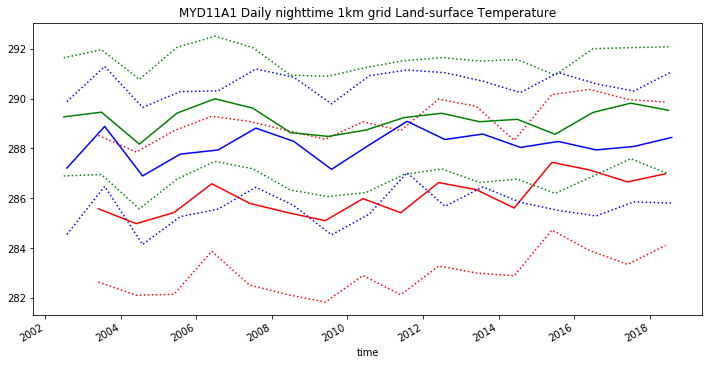

In [7]:
for dataset,details in datasets.items():
    
    nc = xarray.open_dataset("outputs/compressed/"+dataset+"_stats.nc",group="series")

    mean = {l:g for l,g in nc[details['datavar']+"_mean"].groupby('time.month')}
    std = {l:g for l,g in nc[details['datavar']+"_stdev"].groupby('time.month')}
    
    mean[6].plot(color="red", aspect=2, size=5, add_legend = True)
    (mean[6]-std[6]).plot(color="red",ls=":")
    (mean[6]+std[6]).plot(color="red",ls=":")
    
    mean[7].plot(color="green")
    (mean[7]-std[7]).plot(color="green",ls=":")
    (mean[7]+std[7]).plot(color="green",ls=":")
    
    mean[8].plot(color="blue")
    (mean[8]-std[8]).plot(color="blue",ls=":")
    (mean[8]+std[8]).plot(color="blue",ls=":")
    
    plt.tight_layout()
    plt.title(details['long_name'])
    plt.show()

# Grid

In [ ]:
from osgeo import gdal, ogr, osr

nc = xarray.open_dataset("outputs/compressed/mod15a2h_stats.nc",group="grid")
mean = {l:g for l,g in nc['Lai_500m_mean'].groupby('time.month')}

mean[6].sel(time=slice("2000")).plot(x='xdim',y='ydim',col='time',col_wrap=3)
#mean[7].plot(color="green")
#mean[8].plot(color="blue")

